# 构造数据集
数据由前、中、后三个位置的光纤采集而得，分为单次采集与联合采集，制造扰动的动作为脚踏、手触与棒击。
1. 单次采集为在每个位置的光纤都制造三种扰动，以区分不同位置的不同扰动以及明确各个光纤的中心位置。
2. 联合采集是在三个位置的光纤依次制造脚踏、手触与棒击三种扰动，意在区分不同扰动信号。

## 找出光纤中心位置
依据单次扰动的数据，明确三个光纤的中心位置。

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
for i in (os.listdir('./')):
    if '.txt' in i:
        data = []
        with open(i,'r') as f:
            for line in f:
                data.append(int(line.strip()))
        print('{}共有{}个点，一共2000组，每组{}个点'.format(i,len(data),len(data)//2000))

foot_last.txt共有10000000个点，一共2000组，每组5000个点
hand_middle.txt共有10000000个点，一共2000组，每组5000个点
foot_middle.txt共有10000000个点，一共2000组，每组5000个点
stick_last.txt共有10000000个点，一共2000组，每组5000个点
stick_pre.txt共有10000000个点，一共2000组，每组5000个点
three.txt共有10000000个点，一共2000组，每组5000个点
hand_last.txt共有10000000个点，一共2000组，每组5000个点
foot_pre.txt共有10000000个点，一共2000组，每组5000个点
stick_middle.txt共有10000000个点，一共2000组，每组5000个点
hand_pre.txt共有10000000个点，一共2000组，每组5000个点


## 相差处理
处理各个初始文件，5000为一组，后一组减去前一组，得到的数据的后5000个可视为有效信号，予以保留。

In [3]:
def loadData(data):
    '''
    相差法处理原始数据,得到有效数据
    '''
    data = np.array(data)
    valid_data = []
    interval = 5000
    for i in range(0,len(data)-interval,interval):
        temp = [x for x in map(abs, data[i+interval:i+interval*2]-data[i:i+interval])]
        valid_data.append(temp)
    print('共{}组数据，每组数据有{}个点'.format(len(valid_data),len(valid_data[0])))
    return valid_data

### 第一个光纤

In [4]:
pos = 'pre'
# 处理脚踏数据
pre_data = {'foot':[],'hand':[],'stick':[]}
for i in pre_data.keys():
    with open(i+'_'+pos+'.txt','r') as f:
        for line in f:
            pre_data[i].append(int(line.strip()))

    pre_data[i] = loadData(pre_data[i])  

共1999组数据，每组数据有5000个点
共1999组数据，每组数据有5000个点
共1999组数据，每组数据有5000个点


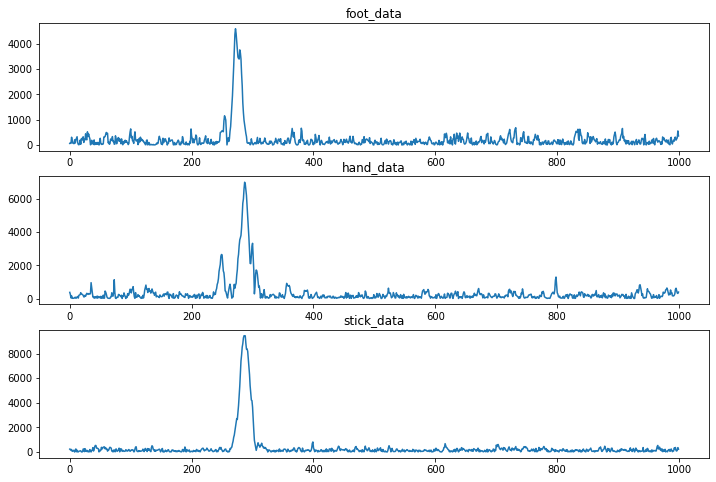

In [5]:
# 画第n组数据
n = 1000

plt.figure(figsize=(12,8))
plt.subplot(311)
plt.title('foot_data')
plt.plot(pre_data['foot'][n][2000:3000])
plt.subplot(312)
plt.title('hand_data')
plt.plot(pre_data['hand'][n][2000:3000])
plt.subplot(313)
plt.title('stick_data')
plt.plot(pre_data['stick'][n][2000:3000])

plt.show()

### 第二个光纤

共1999组数据，每组数据有5000个点
共1999组数据，每组数据有5000个点
共1999组数据，每组数据有5000个点


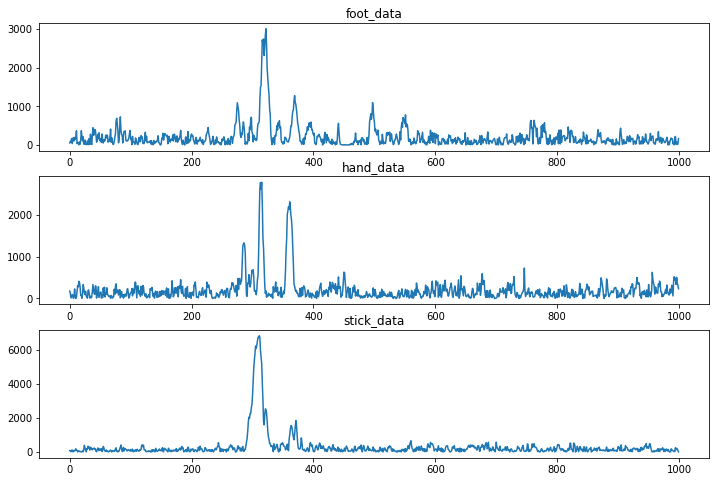

In [6]:
pos = 'middle'
# 处理脚踏数据
mid_data = {'foot':[],'hand':[],'stick':[]}
for i in mid_data.keys():
    with open(i+'_'+pos+'.txt','r') as f:
        for line in f:
            mid_data[i].append(int(line.strip()))

    mid_data[i] = loadData(mid_data[i])  
    
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.title('foot_data')
plt.plot(mid_data['foot'][n][2000:3000])
plt.subplot(312)
plt.title('hand_data')
plt.plot(mid_data['hand'][n][2000:3000])
plt.subplot(313)
plt.title('stick_data')
plt.plot(mid_data['stick'][n][2000:3000])

plt.show()

### 第三个光纤

共1999组数据，每组数据有5000个点
共1999组数据，每组数据有5000个点
共1999组数据，每组数据有5000个点


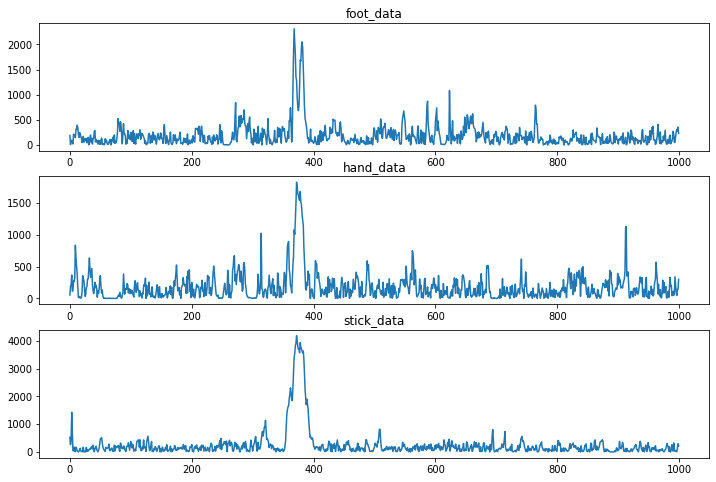

In [7]:
pos = 'last'
# 处理脚踏数据
last_data = {'foot':[],'hand':[],'stick':[]}
for i in last_data.keys():
    with open(i+'_'+pos+'.txt','r') as f:
        for line in f:
            last_data[i].append(int(line.strip()))

    last_data[i] = loadData(last_data[i])  
    
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.title('foot_data')
plt.plot(last_data['foot'][n][2000:3000])
plt.subplot(312)
plt.title('hand_data')
plt.plot(last_data['hand'][n][2000:3000])
plt.subplot(313)
plt.title('stick_data')
plt.plot(last_data['stick'][n][2000:3000])

plt.show()

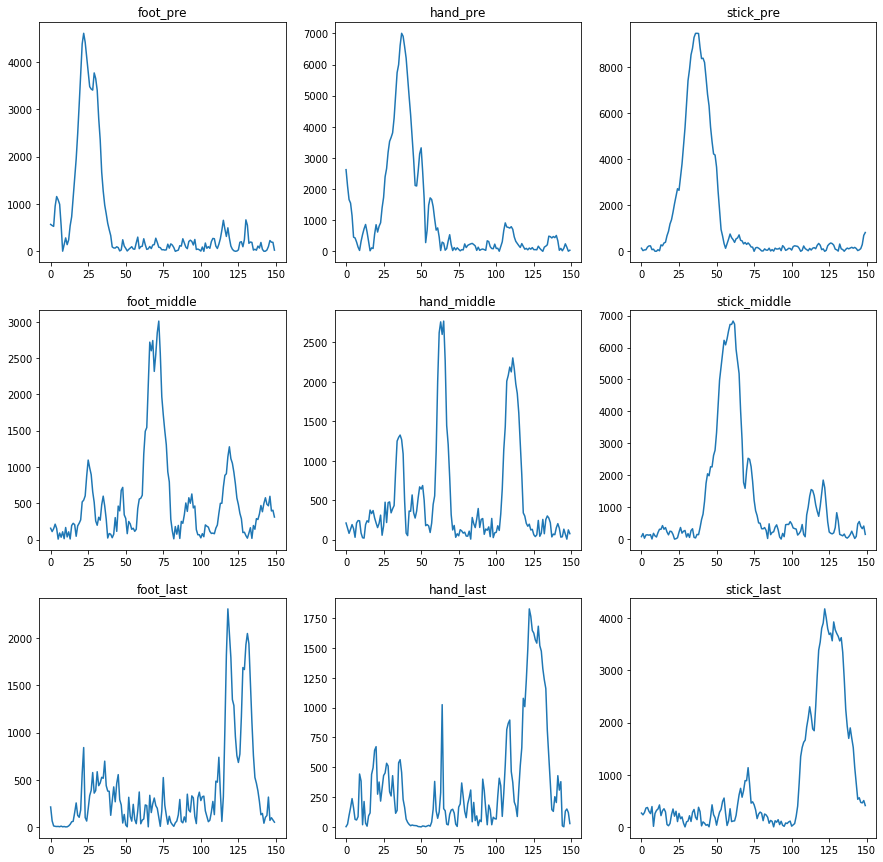

In [8]:
n = 1000
a,b = 2250, 2400
# subplot 先横后竖
plt.figure(figsize=(15,15))
for i in range(1,10):
    num = '33'+str(i)
    plt.subplot(num)
    keys = ['stick','foot','hand']
    if i <= 3:
        plt.plot(pre_data[keys[i%3]][n][a:b])
        plt.title(keys[i%3]+'_pre')
    elif i<=6:
        plt.plot(mid_data[keys[i%3]][n][a:b])
        plt.title(keys[i%3]+'_middle')
    else:
        plt.plot(last_data[keys[i%3]][n][a:b])
        plt.title(keys[i%3]+'_last')
    

综合以上结果，选定第一个位置的光纤信号范围为`[2250:2300]`，第二个为`[2300:2350]`，第三个为`[2350:2400]`。

### 联合采集

确定好每个光纤传感器的数据范围后，将联合采样得到的数据划分，第一个位置的光纤信号为脚踩，第二个为手触，第三个为棒击。
#### 联合采集一维信号

In [9]:
three_data = []
with open('three.txt','r') as f:
    for line in f:
        three_data.append(int(line.strip()))
three_data = loadData(three_data)

共1999组数据，每组数据有5000个点


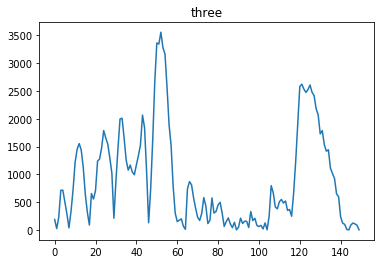

In [10]:
plt.plot(three_data[n][a:b])
plt.title('three')
plt.show()

为了得到联合采集的结果，有两种方案：
- 【方案一】：训练一维神经网络，分别识别前、中、后三个位置的信号，信号的size为(1,50)。
- 【方案二】：训练二维神经网络，分别识别前、中、后三个位置的信号，信号的size为(50,50)。


## 制作一维数据集

单采数据不同位置不同类别各1999组，联合采集信号共1999组，包含三类信号。

In [16]:
from sklearn.utils import shuffle

### 制作单采的数据集

#### 准备数据
已有数据`pre_data, mid_data, last_data`\
先制作foot，hand，stick各自的数据。

In [18]:
foot_data = []
# pre_data, mid_data, last_data
for i in pre_data['foot']:
    foot_data.append(i[2250:2300])
for i in mid_data['foot']:
    foot_data.append(i[2300:2350])
for i in last_data['foot']:
    foot_data.append(i[2350:2400])
        
with open('single/foot_data.txt','w') as f:
    for i in foot_data:
        f.write(str(i)+'\n')

print('脚踏数据共有{}组,每组{}个点'.format(len(foot_data),len(foot_data[-1])))

hand_data = []
for i in pre_data['hand']:
    hand_data.append(i[2250:2300])
for i in mid_data['hand']:
    hand_data.append(i[2300:2350])
for i in last_data['hand']:
    hand_data.append(i[2350:2400])

with open('single/hand_data.txt','w') as f:
    for i in hand_data:
        f.write(str(i)+'\n')

print('手触数据共有{}组，每组{}个点'.format(len(hand_data), len(hand_data[-1])))

stick_data = []
for i in pre_data['stick']:
    stick_data.append(i[2250:2300])
for i in mid_data['stick']:
    stick_data.append(i[2300:2350])
for i in last_data['stick']:
    stick_data.append(i[2350:2400])

with open('single/stick_data.txt','w') as f:
    for i in stick_data:
        f.write(str(i)+'\n')
        
print('棒击数据共有{}组，每组{}个点'.format(len(stick_data), len(stick_data[-1])))

脚踏数据共有5997组,每组50个点
手触数据共有5997组，每组50个点
棒击数据共有5997组，每组50个点


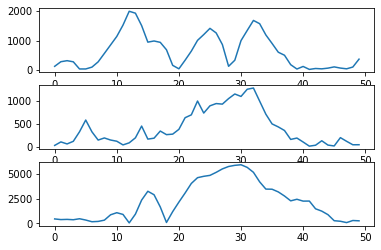

In [19]:
plt.subplot(311)
plt.plot(foot_data[n])
plt.subplot(312)
plt.plot(hand_data[n])
plt.subplot(313)
plt.plot(stick_data[n])
plt.show()

#### 划分数据集

In [20]:
def handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label):
    '''
    拿出数据，打乱，存放
    '''
    train_num = 4997
    val_num = 500
    all_num = 5997
    data = shuffle(data)
    for i in range(train_num):
        train_data.append(data[i])
    for i in range(train_num,train_num+val_num):
        val_data.append(data[i])
    for i in range(train_num+val_num, all_num):
        test_data.append(data[i])
        
    # 将label编码为整数，foot-0，hand-1,stick-2
    if name == 'foot': name = 0
    elif name == 'hand': name = 1
    else: name = 2
    for i in range(train_num):
        train_label.append(name)
    for i in range(val_num):
        val_label.append(name)
        test_label.append(name)
    return train_data,val_data,test_data,train_label,val_label,test_label

In [21]:
file_name = ['foot','hand','stick']
train_data,val_data,test_data,train_label,val_label,test_label = [],[],[],[],[],[]
for name in file_name:
    data = []
    with open('single/'+name+'_data.txt','r') as f:
        for line in f:
            data.append(line.strip('[]\n'))
    handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label)
    print('当前有{}条训练数据，{}条验证数据，{}条测试数据'.format(len(train_data),len(val_data),len(test_data)))
    print('当前有{}个训练标签，{}个验证标签，{}个测试标签'.format(len(train_label),len(val_label),len(test_label)))#

当前有4997条训练数据，500条验证数据，500条测试数据
当前有4997个训练标签，500个验证标签，500个测试标签
当前有9994条训练数据，1000条验证数据，1000条测试数据
当前有9994个训练标签，1000个验证标签，1000个测试标签
当前有14991条训练数据，1500条验证数据，1500条测试数据
当前有14991个训练标签，1500个验证标签，1500个测试标签


In [22]:
# 成对打乱数据
train_data, train_label = shuffle(train_data, train_label)
val_data, val_label = shuffle(val_data, val_label)
test_data, test_label = shuffle(test_data, test_label)
# 写入文件
with open('single/train_data.txt','w') as f:
    for line in train_data:
        f.write(line+'\n')
with open('single/val_data.txt','w') as f:
    for line in val_data:
        f.write(line+'\n')
with open('single/test_data.txt','w') as f:
    for line in test_data:
        f.write(line+'\n')
with open('single/train_label.txt','w') as f:
    for line in train_label:
        f.write(str(line)+'\n')
with open('single/val_label.txt','w') as f:
    for line in val_label:
        f.write(str(line)+'\n')
with open('single/test_label.txt','w') as f:
    for line in test_label:
        f.write(str(line)+'\n')

### 联合采集的数据集

In [24]:
foot_data = []

for i in three_data:
    foot_data.append(i[2250:2300])
        
with open('three/foot_data.txt','w') as f:
    for i in foot_data:
        f.write(str(i)+'\n')

print('脚踏数据共有{}组,每组{}个点'.format(len(foot_data),len(foot_data[-1])))

hand_data = []
for i in three_data:
    hand_data.append(i[2300:2350])

with open('three/hand_data.txt','w') as f:
    for i in hand_data:
        f.write(str(i)+'\n')

print('手触数据共有{}组，每组{}个点'.format(len(hand_data), len(hand_data[-1])))

stick_data = []
for i in three_data:
    stick_data.append(i[2350:2400])

with open('three/stick_data.txt','w') as f:
    for i in stick_data:
        f.write(str(i)+'\n')
        
print('棒击数据共有{}组，每组{}个点'.format(len(stick_data), len(stick_data[-1])))

脚踏数据共有1999组,每组50个点
手触数据共有1999组，每组50个点
棒击数据共有1999组，每组50个点


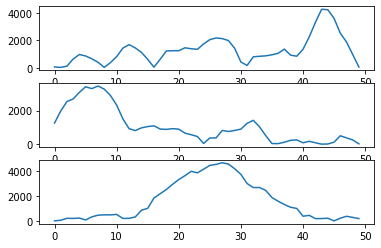

In [25]:
plt.subplot(311)
plt.plot(foot_data[n])
plt.subplot(312)
plt.plot(hand_data[n])
plt.subplot(313)
plt.plot(stick_data[n])
plt.show()

In [26]:
def handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label):
    '''
    拿出数据，打乱，存放
    '''
    train_num = 1665
    val_num = 167
    all_num = 1999
    data = shuffle(data)
    for i in range(train_num):
        train_data.append(data[i])
    for i in range(train_num,train_num+val_num):
        val_data.append(data[i])
    for i in range(train_num+val_num, all_num):
        test_data.append(data[i])
        
    # 将label编码为整数，foot-0，hand-1,stick-2
    if name == 'foot': name = 0
    elif name == 'hand': name = 1
    else: name = 2
    for i in range(train_num):
        train_label.append(name)
    for i in range(val_num):
        val_label.append(name)
        test_label.append(name)
    return train_data,val_data,test_data,train_label,val_label,test_label

file_name = ['foot','hand','stick']
train_data,val_data,test_data,train_label,val_label,test_label = [],[],[],[],[],[]
for name in file_name:
    data = []
    with open('three/'+name+'_data.txt','r') as f:
        for line in f:
            data.append(line.strip('[]\n'))
    handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label)
    print('当前有{}条训练数据，{}条验证数据，{}条测试数据'.format(len(train_data),len(val_data),len(test_data)))
    print('当前有{}个训练标签，{}个验证标签，{}个测试标签'.format(len(train_label),len(val_label),len(test_label)))#

当前有1665条训练数据，167条验证数据，167条测试数据
当前有1665个训练标签，167个验证标签，167个测试标签
当前有3330条训练数据，334条验证数据，334条测试数据
当前有3330个训练标签，334个验证标签，334个测试标签
当前有4995条训练数据，501条验证数据，501条测试数据
当前有4995个训练标签，501个验证标签，501个测试标签


In [27]:
# 成对打乱数据
train_data, train_label = shuffle(train_data, train_label)
val_data, val_label = shuffle(val_data, val_label)
test_data, test_label = shuffle(test_data, test_label)
# 写入文件
with open('three/train_data.txt','w') as f:
    for line in train_data:
        f.write(line+'\n')
with open('three/val_data.txt','w') as f:
    for line in val_data:
        f.write(line+'\n')
with open('three/test_data.txt','w') as f:
    for line in test_data:
        f.write(line+'\n')
with open('three/train_label.txt','w') as f:
    for line in train_label:
        f.write(str(line)+'\n')
with open('three/val_label.txt','w') as f:
    for line in val_label:
        f.write(str(line)+'\n')
with open('three/test_label.txt','w') as f:
    for line in test_label:
        f.write(str(line)+'\n')

### 混合数据集

单采数据 + 联采数据

In [23]:
foot_data = []

for i in pre_data['foot']:
    foot_data.append(i[2250:2300])
for i in mid_data['foot']:
    foot_data.append(i[2300:2350])
for i in last_data['foot']:
    foot_data.append(i[2350:2400])
    
for i in three_data:
    foot_data.append(i[2250:2300])
        
with open('mix/foot_data.txt','w') as f:
    for i in foot_data:
        f.write(str(i)+'\n')

print('脚踏数据共有{}组,每组{}个点'.format(len(foot_data),len(foot_data[-1])))

hand_data = []
for i in pre_data['hand']:
    hand_data.append(i[2250:2300])
for i in mid_data['hand']:
    hand_data.append(i[2300:2350])
for i in last_data['hand']:
    hand_data.append(i[2350:2400])
    
for i in three_data:
    hand_data.append(i[2300:2350])
    
with open('mix/hand_data.txt','w') as f:
    for i in hand_data:
        f.write(str(i)+'\n')

print('手触数据共有{}组，每组{}个点'.format(len(hand_data), len(hand_data[-1])))

stick_data = []
for i in pre_data['stick']:
    stick_data.append(i[2250:2300])
for i in mid_data['stick']:
    stick_data.append(i[2300:2350])
for i in last_data['stick']:
    stick_data.append(i[2350:2400])
    
for i in three_data:
    stick_data.append(i[2350:2400])
    
with open('mix/stick_data.txt','w') as f:
    for i in stick_data:
        f.write(str(i)+'\n')
        
print('棒击数据共有{}组，每组{}个点'.format(len(stick_data), len(stick_data[-1])))

脚踏数据共有7996组,每组50个点
手触数据共有7996组，每组50个点
棒击数据共有7996组，每组50个点


In [24]:
def handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label):
    '''
    拿出数据，打乱，存放
    '''
    train_num = 6664
    val_num = 666
    all_num = 7996
    data = shuffle(data)
    for i in range(train_num):
        train_data.append(data[i])
    for i in range(train_num,train_num+val_num):
        val_data.append(data[i])
    for i in range(train_num+val_num, all_num):
        test_data.append(data[i])
        
    # 将label编码为整数，foot-0，hand-1,stick-2
    if name == 'foot': name = 0
    elif name == 'hand': name = 1
    else: name = 2
    for i in range(train_num):
        train_label.append(name)
    for i in range(val_num):
        val_label.append(name)
        test_label.append(name)
    return train_data,val_data,test_data,train_label,val_label,test_label

file_name = ['foot','hand','stick']
train_data,val_data,test_data,train_label,val_label,test_label = [],[],[],[],[],[]
for name in file_name:
    data = []
    with open('mix/'+name+'_data.txt','r') as f:
        for line in f:
            data.append(line.strip('[]\n'))
    handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label)
    print('当前有{}条训练数据，{}条验证数据，{}条测试数据'.format(len(train_data),len(val_data),len(test_data)))
    print('当前有{}个训练标签，{}个验证标签，{}个测试标签'.format(len(train_label),len(val_label),len(test_label)))#

当前有6664条训练数据，666条验证数据，666条测试数据
当前有6664个训练标签，666个验证标签，666个测试标签
当前有13328条训练数据，1332条验证数据，1332条测试数据
当前有13328个训练标签，1332个验证标签，1332个测试标签
当前有19992条训练数据，1998条验证数据，1998条测试数据
当前有19992个训练标签，1998个验证标签，1998个测试标签


In [25]:
# 成对打乱数据
train_data, train_label = shuffle(train_data, train_label)
val_data, val_label = shuffle(val_data, val_label)
test_data, test_label = shuffle(test_data, test_label)
# 写入文件
with open('mix/train_data.txt','w') as f:
    for line in train_data:
        f.write(line+'\n')
with open('mix/val_data.txt','w') as f:
    for line in val_data:
        f.write(line+'\n')
with open('mix/test_data.txt','w') as f:
    for line in test_data:
        f.write(line+'\n')
with open('mix/train_label.txt','w') as f:
    for line in train_label:
        f.write(str(line)+'\n')
with open('mix/val_label.txt','w') as f:
    for line in val_label:
        f.write(str(line)+'\n')
with open('mix/test_label.txt','w') as f:
    for line in test_label:
        f.write(str(line)+'\n')

## 构建二维数据集

将50组数据叠加为二维数据，纵轴是时间轴，横轴是光纤长度。

### 制作联合采集的二维数据集

In [13]:
# 加载数据
foot_data = []

for i in three_data:
    foot_data.append(i[2250:2300])
        
with open('three2D/foot_data.txt','w') as f:
    for i in foot_data:
        f.write(str(i)+'\n')

print('脚踏数据共有{}组,每组{}个点'.format(len(foot_data),len(foot_data[-1])))

hand_data = []
for i in three_data:
    hand_data.append(i[2300:2350])

with open('three2D/hand_data.txt','w') as f:
    for i in hand_data:
        f.write(str(i)+'\n')

print('手触数据共有{}组，每组{}个点'.format(len(hand_data), len(hand_data[-1])))

stick_data = []
for i in three_data:
    stick_data.append(i[2350:2400])

with open('three2D/stick_data.txt','w') as f:
    for i in stick_data:
        f.write(str(i)+'\n')
        
print('棒击数据共有{}组，每组{}个点'.format(len(stick_data), len(stick_data[-1])))

脚踏数据共有1999组,每组50个点
手触数据共有1999组，每组50个点
棒击数据共有1999组，每组50个点


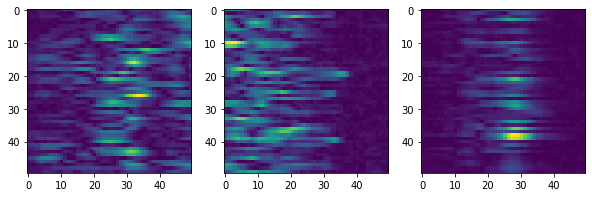

In [14]:
n=1000
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(foot_data[n:n+50])
plt.subplot(132)
plt.imshow(hand_data[n:n+50])
plt.subplot(133)
plt.imshow(stick_data[n:n+50])
plt.show()

In [70]:
def handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label):
    '''
    拿出数据，1D叠加成2D，为了保存再压缩成1D，打乱，存放
    '''
    train_num = 1623
    val_num = 163
    all_num = 1949
    
    for i in range(train_num):
        train_data.append(data[i:i+50])
    for i in range(train_num,train_num+val_num):
        val_data.append(data[i:i+50])
    for i in range(train_num+val_num, all_num):
        test_data.append(data[i:i+50])
    
    # 将label编码为整数，foot-0，hand-1,stick-2
    if name == 'foot': name = 0
    elif name == 'hand': name = 1
    else: name = 2
    for i in range(train_num):
        train_label.append(name)
    for i in range(val_num):
        val_label.append(name)
        test_label.append(name)
    return train_data,val_data,test_data,train_label,val_label,test_label

In [71]:
file_name = ['foot','hand','stick']
train_data,val_data,test_data,train_label,val_label,test_label = [],[],[],[],[],[]
for name in file_name:
    data = []
    with open('three2D/'+name+'_data.txt','r') as f:
        for line in f:
            data.append([int(x) for x in line.strip('[]\n').split(',')])
    handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label)
    print('当前有{}条训练数据，{}条验证数据，{}条测试数据'.format(len(train_data),len(val_data),len(test_data)))
    print('当前有{}个训练标签，{}个验证标签，{}个测试标签'.format(len(train_label),len(val_label),len(test_label)))#

train_data = np.array(train_data)
val_data = np.array(val_data)
test_data = np.array(test_data)

当前有1623条训练数据，163条验证数据，163条测试数据
当前有1623个训练标签，163个验证标签，163个测试标签
当前有3246条训练数据，326条验证数据，326条测试数据
当前有3246个训练标签，326个验证标签，326个测试标签
当前有4869条训练数据，489条验证数据，489条测试数据
当前有4869个训练标签，489个验证标签，489个测试标签


In [73]:
test_data.shape

(489, 50, 50)

In [74]:
# 成对打乱数据
train_data, train_label = shuffle(train_data, train_label)
val_data, val_label = shuffle(val_data, val_label)
test_data, test_label = shuffle(test_data, test_label)

In [111]:
def save2d(data2d):
    for i in range(data2d.shape[0]):
        for j in range(data2d.shape[1]):
            f.write(str(list(data2d[i][j]))+'\t')
        f.write('\n')

In [112]:
# 写入文件
with open('three2D/train_data.txt','w') as f:
    save2d(train_data)
with open('three2D/val_data.txt','w') as f:
    save2d(val_data)
with open('three2D/test_data.txt','w') as f:
    save2d(test_data) 
with open('three2D/train_label.txt','w') as f:
    for line in train_label:
        f.write(str(line)+'\n')
with open('three2D/val_label.txt','w') as f:
    for line in val_label:
        f.write(str(line)+'\n')
with open('three2D/test_label.txt','w') as f:
    for line in test_label:
        f.write(str(line)+'\n')

In [142]:
# 读取文件
t = []
with open('three2D/test_data.txt','r') as f:
    for line in f:
        t.append(line.strip().split('\t'))

for i in range(len(t)):
    for j in range(len(t[i])):
        t[i][j] = [int(x) for x in t[i][j].strip('[]').split(',')]

l = []
with open('three2D/test_label.txt','r') as f:
    for line in f:
        if line.strip() == '0':
            l.append('foot')
        elif line.strip() == '1':
            l.append('hand')
        else:
            l.append('stick')

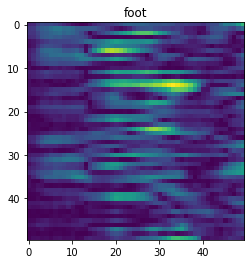

In [144]:
n = 60
plt.imshow(t[n])
plt.title(l[n])
plt.show()

### 制作混合的二维数据集

In [26]:
foot_data = []

for i in pre_data['foot']:
    foot_data.append(i[2250:2300])
for i in mid_data['foot']:
    foot_data.append(i[2300:2350])
for i in last_data['foot']:
    foot_data.append(i[2350:2400])
    
for i in three_data:
    foot_data.append(i[2250:2300])
        
with open('mix/foot_data.txt','w') as f:
    for i in foot_data:
        f.write(str(i)+'\n')

print('脚踏数据共有{}组,每组{}个点'.format(len(foot_data),len(foot_data[-1])))

hand_data = []
for i in pre_data['hand']:
    hand_data.append(i[2250:2300])
for i in mid_data['hand']:
    hand_data.append(i[2300:2350])
for i in last_data['hand']:
    hand_data.append(i[2350:2400])
    
for i in three_data:
    hand_data.append(i[2300:2350])
    
with open('mix/hand_data.txt','w') as f:
    for i in hand_data:
        f.write(str(i)+'\n')

print('手触数据共有{}组，每组{}个点'.format(len(hand_data), len(hand_data[-1])))

stick_data = []
for i in pre_data['stick']:
    stick_data.append(i[2250:2300])
for i in mid_data['stick']:
    stick_data.append(i[2300:2350])
for i in last_data['stick']:
    stick_data.append(i[2350:2400])
    
for i in three_data:
    stick_data.append(i[2350:2400])
    
with open('mix/stick_data.txt','w') as f:
    for i in stick_data:
        f.write(str(i)+'\n')
        
print('棒击数据共有{}组，每组{}个点'.format(len(stick_data), len(stick_data[-1])))

脚踏数据共有7996组,每组50个点
手触数据共有7996组，每组50个点
棒击数据共有7996组，每组50个点


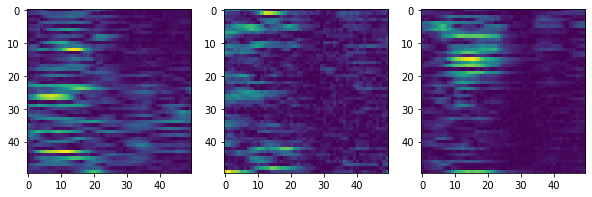

In [30]:
n=2000
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(foot_data[n:n+50])
plt.subplot(132)
plt.imshow(hand_data[n:n+50])
plt.subplot(133)
plt.imshow(stick_data[n:n+50])
plt.show()

In [31]:
def handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label):
    '''
    拿出数据，1D叠加成2D，为了保存再压缩成1D，打乱，存放
    '''
    train_num = 6622
    val_num = 662
    all_num = 7946
    
    for i in range(train_num):
        train_data.append(data[i:i+50])
    for i in range(train_num,train_num+val_num):
        val_data.append(data[i:i+50])
    for i in range(train_num+val_num, all_num):
        test_data.append(data[i:i+50])
    
    # 将label编码为整数，foot-0，hand-1,stick-2
    if name == 'foot': name = 0
    elif name == 'hand': name = 1
    else: name = 2
    for i in range(train_num):
        train_label.append(name)
    for i in range(val_num):
        val_label.append(name)
        test_label.append(name)
    return train_data,val_data,test_data,train_label,val_label,test_label

file_name = ['foot','hand','stick']
train_data,val_data,test_data,train_label,val_label,test_label = [],[],[],[],[],[]
for name in file_name:
    data = []
    with open('mix2D/'+name+'_data.txt','r') as f:
        for line in f:
            data.append([int(x) for x in line.strip('[]\n').split(',')])
    handle_data(name,data,train_data,val_data,test_data,train_label,val_label,test_label)
    print('当前有{}条训练数据，{}条验证数据，{}条测试数据'.format(len(train_data),len(val_data),len(test_data)))
    print('当前有{}个训练标签，{}个验证标签，{}个测试标签'.format(len(train_label),len(val_label),len(test_label)))#

train_data = np.array(train_data)
val_data = np.array(val_data)
test_data = np.array(test_data)

当前有6622条训练数据，662条验证数据，662条测试数据
当前有6622个训练标签，662个验证标签，662个测试标签
当前有13244条训练数据，1324条验证数据，1324条测试数据
当前有13244个训练标签，1324个验证标签，1324个测试标签
当前有19866条训练数据，1986条验证数据，1986条测试数据
当前有19866个训练标签，1986个验证标签，1986个测试标签


In [32]:
train_data.shape

(19866, 50, 50)

In [33]:
# 成对打乱数据
train_data, train_label = shuffle(train_data, train_label)
val_data, val_label = shuffle(val_data, val_label)
test_data, test_label = shuffle(test_data, test_label)

In [34]:
def save2d(data2d):
    for i in range(data2d.shape[0]):
        for j in range(data2d.shape[1]):
            f.write(str(list(data2d[i][j]))+'\t')
        f.write('\n')
        
# 写入文件
with open('mix2D/train_data.txt','w') as f:
    save2d(train_data)
with open('mix2D/val_data.txt','w') as f:
    save2d(val_data)
with open('mix2D/test_data.txt','w') as f:
    save2d(test_data) 
with open('mix2D/train_label.txt','w') as f:
    for line in train_label:
        f.write(str(line)+'\n')
with open('mix2D/val_label.txt','w') as f:
    for line in val_label:
        f.write(str(line)+'\n')
with open('mix2D/test_label.txt','w') as f:
    for line in test_label:
        f.write(str(line)+'\n')